In [94]:
import gym
import logging
import numpy as np

from client import CarDirection, Client
from env import JunctionEnvironment
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

logger = logging.getLogger(None)
logger.setLevel(logging.WARNING)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
team_name = "ipa"
team_key = "admin"

In [98]:
client = Client(team_name=team_name, team_key=team_key)
env = JunctionEnvironment(client)

In [102]:
observes = env.reset()
car_ids = env.car_ids
dones = {car_id: False for car_id in car_ids}
scores = {car_id: 0 for car_id in car_ids}

In [103]:
def megaalg(obs):
    return np.random.randint(0, 5)

In [ ]:
while True:
    for car_id in car_ids:
        if dones[car_id]:
            continue
        
        action = megaalg(observes[car_id])
        obs, score, done, _ = env.step(action, car_id)
        observes[car_id] = obs
        scores[car_id] = score
        dones[car_id] = done
    
    if all(dones.values()):
        break

In [79]:
car_id = list(observes.keys())[0]
obs = observes[car_id]

In [81]:
while True:
    action = megaalg(obs)
    obs, score, done, _ = env.step(action, car_id)
    break

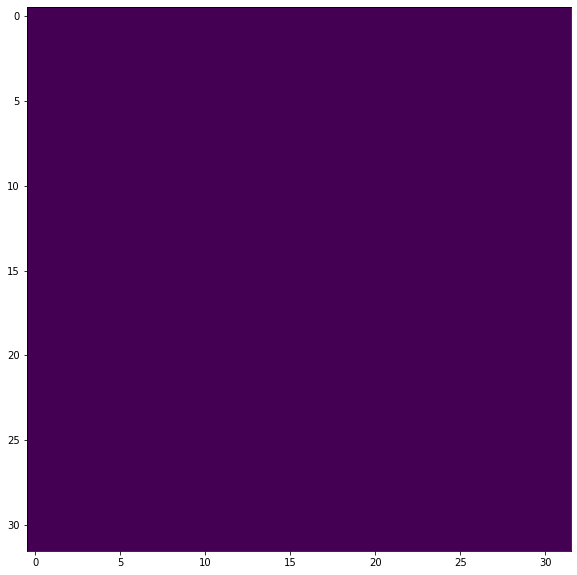

In [92]:
plt.figure(figsize=(10, 10))
plt.imshow(obs[:,:,5][::-1,])

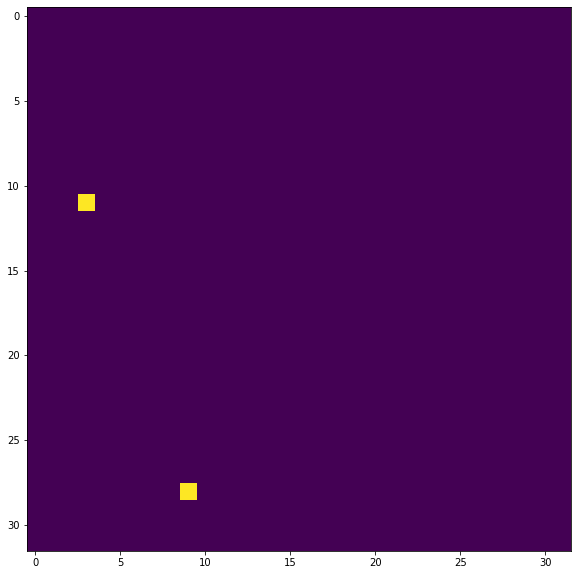

In [91]:
plt.figure(figsize=(10, 10))
plt.imshow(obs[:,:,7][::-1,])

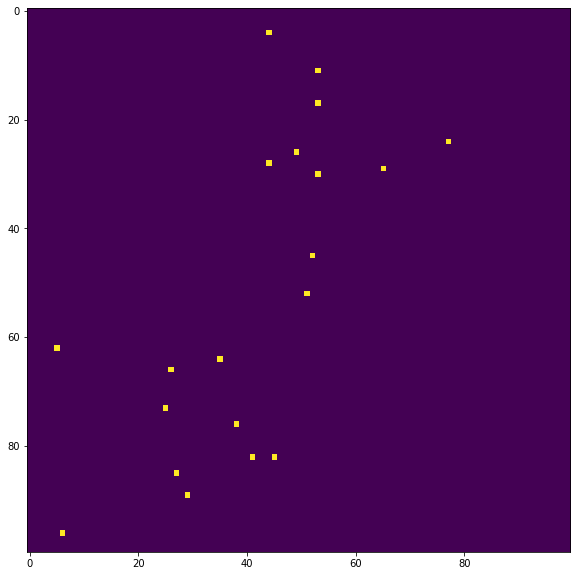

In [61]:
plt.figure(figsize=(10, 10))
plt.imshow(obs[:,:,3][::-1,])

In [400]:
obs = client.get_world()

In [401]:
customers = obs["customers"]

In [402]:
customers = [c for c in customers.values() if c["status"] == "waiting"]

In [403]:
cars = client.get_team_cars()

In [404]:
env = JunctionEnvironment(cars[0], client)

In [405]:
obs, _, _, _ = env.step(3)

C:\Users\antpo\Desktop\junction2019\junction2019_erricson\env.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  done = "grid" in obs


In [414]:
(np.moveaxis(np.array(obs), 0, 2)[:,:,4] == obs[4]).mean()

1.0

In [415]:
np.moveaxis(np.array(obs), 0, 2)[:,:,4].sum()

1.0

In [338]:
obs

(array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0.

In [ ]:
np.

In [186]:
def _index_to_coordinates(index, width):
    x = index % width
    y = index // width
    return x, y

def _coordinates_to_index(x, y, width):
    return x + width * y

In [101]:
customers[0]["origin"]

4735

In [266]:
client.start_game()

In [267]:
width = client.get_world()["width"]

grid = client.get_world()["grid"]
customers = client.get_world()["customers"]
customers = [c for c in customers.values() if c["status"] == "waiting"]

grid = np.array(grid).reshape(width, width)

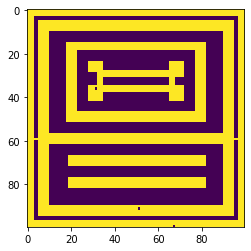

In [268]:
plt.imshow(grid[::-1,:])

In [271]:
from scipy.spatial.distance import cityblock

In [272]:
cityblock((1, 1), (6, 5))

9

In [274]:
obs.keys()

dict_keys(['width', 'height', 'grid', 'cars', 'customers', 'teams', 'ticktime', 'ticks'])

In [277]:
obs["teams"]

{'0': {'name': 'ipa', 'score': 0}}

In [275]:
obs['cars']

{'0': {'team_id': 0, 'position': 6040, 'capacity': 5, 'used_capacity': 0},
 '1': {'team_id': 0, 'position': 9504, 'capacity': 5, 'used_capacity': 0},
 '2': {'team_id': 0, 'position': 8954, 'capacity': 5, 'used_capacity': 0}}

In [ ]:
obs["cars"]

In [269]:
for customer in customers:
    x, y = _index_to_coordinates(customer["origin"], width)
    grid[y, x] = 0`

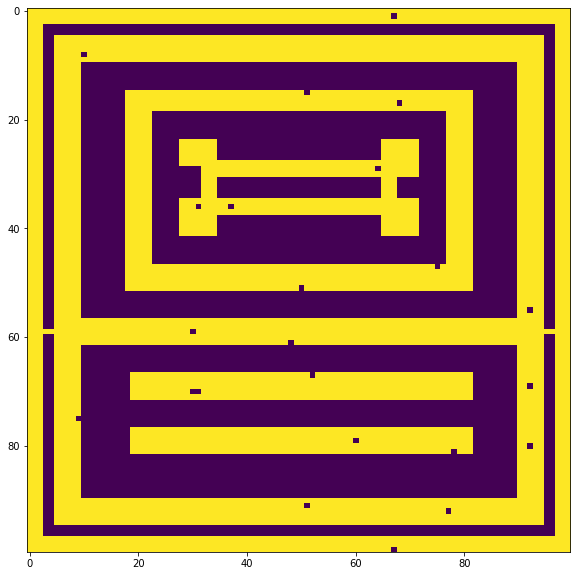

In [270]:
plt.figure(figsize=(10, 10))
plt.imshow(grid[::-1,:])

In [115]:
_index_to_coordinates(customers[0]["origin"], 32)

(31, 147)

In [73]:
env = JunctionEnvironment(cars[0], client)

In [74]:
env.reset()

NameError: name 'customers' is not defined

In [59]:
env.width

100

In [76]:
obs = client.get_world()

In [62]:
grid = obs["grid"]

In [78]:
obs.keys()

dict_keys(['width', 'height', 'grid', 'cars', 'customers', 'teams', 'ticktime', 'ticks'])

In [82]:
np.

[autoreload of env failed: Traceback (most recent call last):
  File "C:\Users\antpo\Anaconda3\envs\junction2019\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\antpo\Anaconda3\envs\junction2019\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\antpo\Anaconda3\envs\junction2019\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\antpo\Anaconda3\envs\junction2019\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed

NameError: name 'np' is not defined

In [81]:
obs["customers"]

{'0': {'origin': 4735, 'destination': 36, 'status': 'waiting', 'car_id': -1},
 '1': {'origin': 645, 'destination': 9031, 'status': 'waiting', 'car_id': -1},
 '10': {'origin': 1057,
  'destination': 7187,
  'status': 'waiting',
  'car_id': -1},
 '11': {'origin': 7757,
  'destination': 6707,
  'status': 'waiting',
  'car_id': -1},
 '12': {'origin': 7862,
  'destination': 7107,
  'status': 'waiting',
  'car_id': -1},
 '13': {'origin': 9536,
  'destination': 1795,
  'status': 'waiting',
  'car_id': -1},
 '14': {'origin': 8661,
  'destination': 7356,
  'status': 'waiting',
  'car_id': -1},
 '15': {'origin': 8546,
  'destination': 8351,
  'status': 'waiting',
  'car_id': -1},
 '16': {'origin': 4426,
  'destination': 6237,
  'status': 'waiting',
  'car_id': -1},
 '17': {'origin': 1560,
  'destination': 4050,
  'status': 'waiting',
  'car_id': -1},
 '18': {'origin': 7099,
  'destination': 8405,
  'status': 'waiting',
  'car_id': -1},
 '19': {'origin': 5357,
  'destination': 2693,
  'status': '

In [79]:
obs["customers"]

{'0': {'origin': 4735, 'destination': 36, 'status': 'waiting', 'car_id': -1},
 '1': {'origin': 645, 'destination': 9031, 'status': 'waiting', 'car_id': -1},
 '10': {'origin': 1057,
  'destination': 7187,
  'status': 'waiting',
  'car_id': -1},
 '11': {'origin': 7757,
  'destination': 6707,
  'status': 'waiting',
  'car_id': -1},
 '12': {'origin': 7862,
  'destination': 7107,
  'status': 'waiting',
  'car_id': -1},
 '13': {'origin': 9536,
  'destination': 1795,
  'status': 'waiting',
  'car_id': -1},
 '14': {'origin': 8661,
  'destination': 7356,
  'status': 'waiting',
  'car_id': -1},
 '15': {'origin': 8546,
  'destination': 8351,
  'status': 'waiting',
  'car_id': -1},
 '16': {'origin': 4426,
  'destination': 6237,
  'status': 'waiting',
  'car_id': -1},
 '17': {'origin': 1560,
  'destination': 4050,
  'status': 'waiting',
  'car_id': -1},
 '18': {'origin': 7099,
  'destination': 8405,
  'status': 'waiting',
  'car_id': -1},
 '19': {'origin': 5357,
  'destination': 2693,
  'status': '

In [30]:
client.get_team_id()

'0'

In [29]:
cars

[]

In [27]:
client.get_cars()

{'0': {'team_id': 0, 'position': 9929, 'capacity': 5, 'used_capacity': 0},
 '1': {'team_id': 0, 'position': 4499, 'capacity': 5, 'used_capacity': 0},
 '2': {'team_id': 0, 'position': 4197, 'capacity': 5, 'used_capacity': 0}}

In [22]:
client.get_teams()

{'0': {'name': 'ipa', 'score': 0}}

In [ ]:
team_id = 

In [ ]:
env = JunctionEnvironment()

In [59]:
start_game()

In [60]:
world = get_world()

http://127.0.0.1:8080/api/v1/world


In [15]:
score = get_score()

In [16]:
score

{'Harold-and-Marquis': {'current': 0, 'scores': [['IslandsAndBridges', 0]]}}

In [7]:
world.keys()

dict_keys(['width', 'height', 'grid', 'cars', 'customers', 'teams', 'ticktime', 'ticks'])

In [97]:
world["cars"]

{'0': {'team_id': 0, 'position': 9529, 'capacity': 5, 'used_capacity': 0},
 '1': {'team_id': 0, 'position': 470, 'capacity': 5, 'used_capacity': 0},
 '2': {'team_id': 0, 'position': 1395, 'capacity': 5, 'used_capacity': 0},
 '3': {'team_id': 1, 'position': 61, 'capacity': 5, 'used_capacity': 0},
 '4': {'team_id': 1, 'position': 8084, 'capacity': 5, 'used_capacity': 0},
 '5': {'team_id': 1, 'position': 1644, 'capacity': 5, 'used_capacity': 0},
 '6': {'team_id': 2, 'position': 1280, 'capacity': 5, 'used_capacity': 0},
 '7': {'team_id': 2, 'position': 457, 'capacity': 5, 'used_capacity': 0},
 '8': {'team_id': 2, 'position': 9985, 'capacity': 5, 'used_capacity': 0}}

In [98]:
world["customers"]

{'0': {'origin': 14, 'destination': 9629, 'status': 'waiting', 'car_id': -1},
 '1': {'origin': 1581, 'destination': 1080, 'status': 'waiting', 'car_id': -1},
 '10': {'origin': 489, 'destination': 758, 'status': 'waiting', 'car_id': -1},
 '11': {'origin': 1097, 'destination': 57, 'status': 'waiting', 'car_id': -1},
 '12': {'origin': 802, 'destination': 7642, 'status': 'waiting', 'car_id': -1},
 '13': {'origin': 5259,
  'destination': 1935,
  'status': 'waiting',
  'car_id': -1},
 '14': {'origin': 1474, 'destination': 613, 'status': 'waiting', 'car_id': -1},
 '15': {'origin': 7987, 'destination': 87, 'status': 'waiting', 'car_id': -1},
 '16': {'origin': 6721, 'destination': 50, 'status': 'waiting', 'car_id': -1},
 '17': {'origin': 1600, 'destination': 457, 'status': 'waiting', 'car_id': -1},
 '18': {'origin': 9897,
  'destination': 7648,
  'status': 'waiting',
  'car_id': -1},
 '19': {'origin': 9900,
  'destination': 1139,
  'status': 'waiting',
  'car_id': -1},
 '2': {'origin': 9861, 'd

In [99]:
world["teams"]

{'0': {'name': 'Winifred-and-Gary', 'score': 0},
 '1': {'name': 'John-and-Dwayne', 'score': 0},
 '2': {'name': 'Richard-and-Benjamin', 'score': 0}}

In [100]:
world["ticktime"]

200

In [101]:
world["ticks"]

3159

In [22]:
world

False

In [11]:
previous_car_directions = {}
while True:
    world = get_world()
    if not world:
        start_game()
        continue

    new_car_directions = move_cars(token, world, previous_car_directions)
    previous_car_directions = new_car_directions
    time.sleep(1)

NameError: name 'token' is not defined